In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats

import etroc1_array

C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


number of lines is 200000
 35  51 171 0

hitflag is 0
 35  51 171 0

toa is 35
split is ['35', '51', '171', '0']
toa[0:5] is [35, 35, 35, 35, 35]
tot[0:5] is [51, 51, 51, 51, 51]
cal[0:5] is [171, 171, 171, 171, 171]
hitposition[0:5] is [17, 49, 81, 113, 145]
hitposition_mod[0:5] is [17, 17, 17, 17, 17]


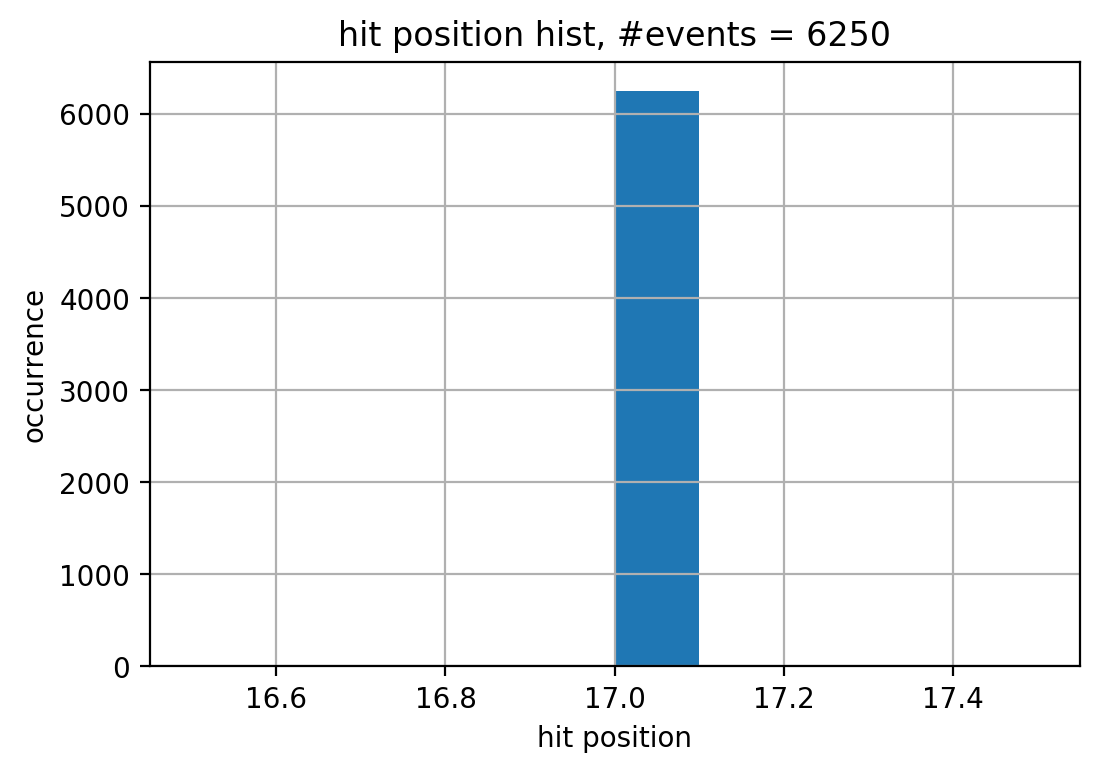

number of lines is 200000
 35  51 171 0

hitflag is 0
 35  51 171 0

toa is 35
split is ['35', '51', '171', '0']
toa[0:5] is [35, 35, 35, 35, 35]
tot[0:5] is [51, 51, 51, 51, 51]
cal[0:5] is [171, 171, 171, 171, 171]
hitposition[0:5] is [17, 49, 81, 113, 145]
hitposition_mod[0:5] is [17, 17, 17, 17, 17]


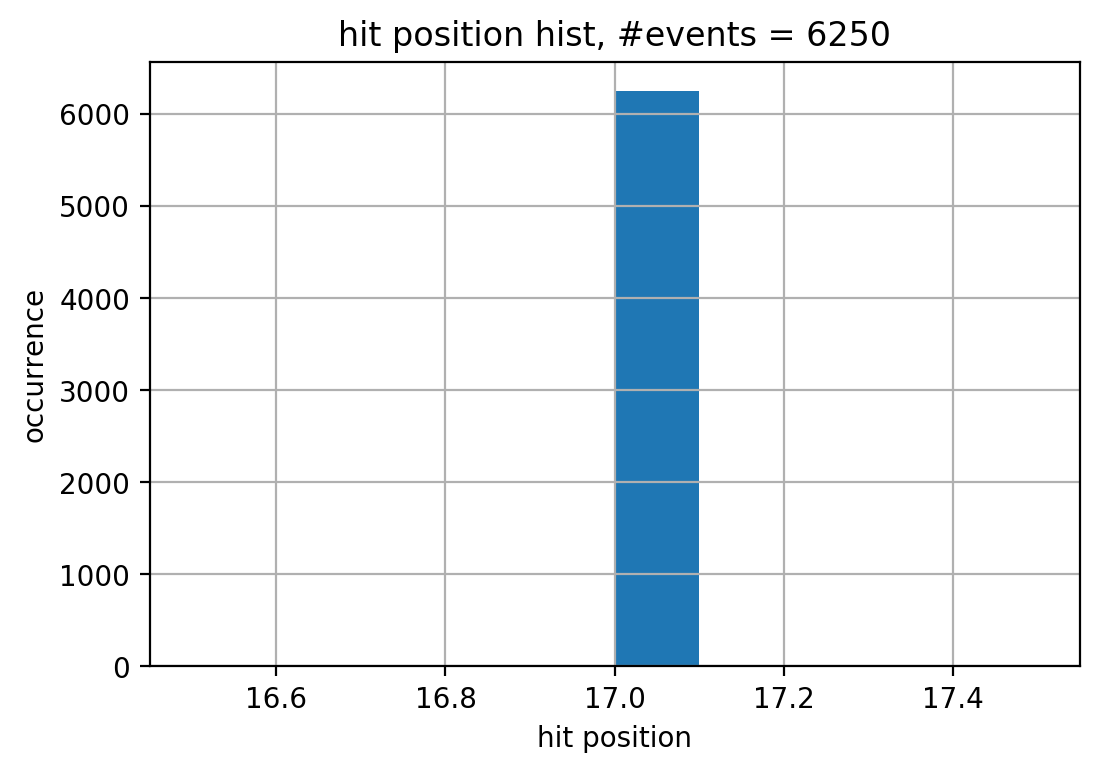

In [15]:
# path = '../../../CMS ETL ASIC/ETROC1/test/test results/SMU/ETROC1 arrary at smu/2020-06-30_Array_Test_Results/'
path = './PhaseAdj_vs_TOA_Code2/'
# file_in = 'Array_Data_Pixel=15_DAC_P15=409_QSel=6_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=30_TDC_Mode_Output_B1_1000000_2020-07-01_17-22-24.dat'
# file_in = 'Array_Data_Pixel=15_DAC_P15=409_QSel=18_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=30_TDC_Mode_Output_B1_1000000_2020-07-01_17-23-08.dat'
file_in = 'Array_T_Pixel=15_DAC_P15=512_QSel=28_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=116_B1_200000_07-09_19-13-06.dat'

datapath = os.listdir(path)
file_in = [item for item in datapath]

qinj_base = 32    ##  1.5 MHz Qinj frequency

for i in range(0,2):
    f_r = open(path+file_in[2], 'r')
    lines = f_r.readlines()
    f_r.close()
    
    num_lines = len(lines)
    
    print('number of lines is', num_lines)
    
    word_to_plot = num_lines
    
    print(lines[0])
    print('hitflag is',lines[0].split()[3])
    
    print(lines[0])
    print('toa is',int(lines[0].split()[0]))
    
    print('split is',lines[0].split())
    
    
    toa = []
    tot = []
    cal = []
    hitposition = []
    hitposition_mod = []
    events = 0
    for i in range (0, num_lines):
        line_item = lines[i]
        if line_item.split()[3] == '1':
            toa.append(int(lines[i].split()[0]))
            tot.append(int(line_item.split()[1]))
            cal.append(int(line_item.split()[2]))
            hitposition.append(i)
            hitposition_mod.append(i%qinj_base)
            events = events + 1
        
    
        
    print('toa[0:5] is', toa[0:5])
    print('tot[0:5] is', tot[0:5])
    print('cal[0:5] is', cal[0:5])
    print('hitposition[0:5] is', hitposition[0:5])
    print('hitposition_mod[0:5] is', hitposition_mod[0:5])
    
    num_bins = None
    
    ######### Plot hit position  ##############
    fig, ax1 = plt.subplots(dpi=200)
    ax1.hist(hitposition_mod)
    # ax1.set_xlim(left=left_limit,right=right_limit)
    ax1.grid()
    ax1.set(xlabel='hit position', ylabel='occurrence',
           title='hit position hist, #events = %d'%(events))
    plt.show()
    
# ######### Plot toa with word_index  ###########
# fig, ax1 = plt.subplots(dpi=200)
# ax1.plot(toa)
# # ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.grid()
# ax1.set(xlabel='event_index', ylabel='toa',
#        title='toa vs event, #events = %d'%(events))
# plt.show()


# ######### Plot toa hist  ###########
# # fig, ax2 = plt.subplots(dpi=200)
# # ax2.hist(toa)
# # ax2.grid()
# # ax2.set(xlabel='toa', ylabel='occurrence',
# #        title='toa hist, #events = %d'%(events))
# # plt.show()

# etroc1_array.plot_distribution_toa(toa, num_bins= None, range_default = None, xaxis = 'TOA',
#                         ylable = 'Occurrence', title = 'TOA Hist', pic = True, pdf = False)


# ######### Plot tot with word_index  ###########
# fig, ax1 = plt.subplots(dpi=200)
# ax1.plot(tot)
# # ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.grid()
# ax1.set(xlabel='event_index', ylabel='tot',
#        title='tot vs event, #events = %d'%(events))
# plt.show()


# ######### Plot tot hist  ###########
# # fig, ax2 = plt.subplots(dpi=200)
# # ax2.hist(tot, bins=num_bins)
# # ax2.grid()
# # ax2.set(xlabel='tot', ylabel='occurrence',
# #        title='tot hist, #events = %d'%(events))
# # plt.show()

# etroc1_array.plot_distribution_toa(tot, num_bins= None, range_default = None, xaxis = 'TOT',
#                         ylable = 'Occurrence', title = 'TOT Hist', pic = True, pdf = False)


# ######### Plot tot with word_index  ###########
# fig, ax1 = plt.subplots(dpi=200)
# ax1.plot(cal)
# # ax1.set_xlim(left=left_limit,right=right_limit)
# ax1.grid()
# ax1.set(xlabel='event_index', ylabel='toa',
#        title='cal vs event, #events = %d'%(events))
# plt.show()


# ######### Plot cal hist  ###########
# # fig, ax2 = plt.subplots(dpi=200)
# # ax2.hist(cal, bins=num_bins)
# # ax2.grid()
# # ax2.set(xlabel='tot', ylabel='occurrence',
# #        title='cal hist, #events = %d'%(events))
# # plt.show()

# etroc1_array.plot_distribution_toa(cal, num_bins= None, range_default = None, xaxis = 'CAL',
#                         ylable = 'Occurrence', title = 'Cal Hist', pic = True, pdf = False)
